# 03. How to use MNIST

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

%matplotlib inline  
print ("packs loaded")

packs loaded


In [2]:
print ("Download and Extract MNIST dataset")
mnist = input_data.read_data_sets('data/', one_hot=True)
print
print (" tpye of 'mnist' is %s" % (type(mnist)))
print (" number of trian data is %d" % (mnist.train.num_examples))
print (" number of test data is %d" % (mnist.test.num_examples))


Download and Extract MNIST dataset
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/t10k-labels-idx1-ubyte.gz
 tpye of 'mnist' is <class 'tensorflow.contrib.learn.python.learn.datasets.base.Datasets'>
 number of trian data is 55000
 number of test data is 10000


In [4]:
print ("What does the data of MNIST look like?")
trainimg   = mnist.train.images
trainlabel = mnist.train.labels
testimg    = mnist.test.images
testlabel  = mnist.test.labels
print
print (" type of 'trainimg' is %s"    % (type(trainimg)))
print (" type of 'trainlabel' is %s"  % (type(trainlabel)))
print (" type of 'testimg' is %s"     % (type(testimg)))
print (" type of 'testlabel' is %s"   % (type(testlabel)))
print (" shape of 'trainimg' is %s"   % (trainimg.shape,))
print (" shape of 'trainlabel' is %s" % (trainlabel.shape,))
print (" shape of 'testimg' is %s"    % (testimg.shape,))
print (" shape of 'testlabel' is %s"  % (testlabel.shape,))

What does the data of MNIST look like?
 type of 'trainimg' is <class 'numpy.ndarray'>
 type of 'trainlabel' is <class 'numpy.ndarray'>
 type of 'testimg' is <class 'numpy.ndarray'>
 type of 'testlabel' is <class 'numpy.ndarray'>
 shape of 'trainimg' is (55000, 784)
 shape of 'trainlabel' is (55000, 10)
 shape of 'testimg' is (10000, 784)
 shape of 'testlabel' is (10000, 10)


In [5]:
mnist.train.images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [7]:
def print_np(x):
    print('SHAPE OF is %s' % (x.shape,))
    print('VALUES LOOK LIKE \n %s' % (x))

In [8]:
print_np(mnist.train.images)

SHAPE OF is (55000, 784)
VALUES LOOK LIKE 
 [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [9]:
print_np(mnist.train.labels)

SHAPE OF is (55000, 10)
VALUES LOOK LIKE 
 [[ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]]


In [10]:
# 55,000 x 784 / label : 10

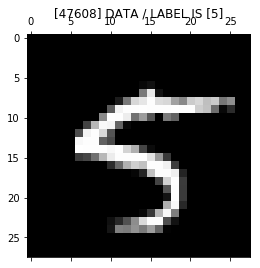

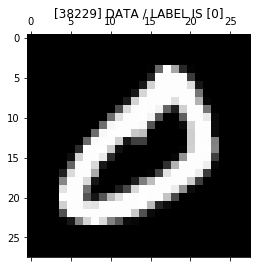

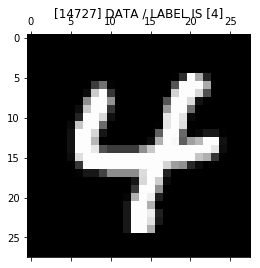

In [11]:
ntrain = mnist.train.images.shape[0]
nsample = 3
randidx = np.random.randint(ntrain, size=nsample)
for i in randidx:
    imgvec = mnist.train.images[i, :]
    labelvec = mnist.train.labels[i, :]
    img = np.reshape(imgvec, (28, 28))
    label = np.argmax(labelvec) # one hot vector를 label로 바꿔줌
    plt.matshow(img, cmap=plt.get_cmap('gray'))
    plt.title("[%d] DATA / LABEL IS [%d]" % (i, label))

In [12]:
labelvec

array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.])

In [ ]:
np.argmax(labelvec)

In [13]:
ntrain = 10
randindices = np.random.permutation(ntrain)
print(randindices.shape)

(10,)


In [15]:
ntrain = 10
nbatch = 4
niter = ntrain // nbatch + 1
for i in range(niter):
    currindices = randindices[i*nbatch:(i+1)*nbatch]
    print("ITER : [%d] BATCH INDEX: %s " %(i, currindices))
    
    xbatch = mnist.train.images[currindices, :]
    ybatch = mnist.train.labels[currindices, :]
    print(" - SHAPE OF 'XBATCH' is %s" % (xbatch.shape,))
    print(" - SHAPE OF 'YBATCH' is %s" % (ybatch.shape,))

ITER : [0] BATCH INDEX: [2 6 5 1] 
 - SHAPE OF 'XBATCH' is (4, 784)
 - SHAPE OF 'YBATCH' is (4, 10)
ITER : [1] BATCH INDEX: [8 7 9 0] 
 - SHAPE OF 'XBATCH' is (4, 784)
 - SHAPE OF 'YBATCH' is (4, 10)
ITER : [2] BATCH INDEX: [4 3] 
 - SHAPE OF 'XBATCH' is (2, 784)
 - SHAPE OF 'YBATCH' is (2, 10)
